In [2]:
import pandas as pd
import numpy as np

In [6]:
url='tips.csv'
df=pd.read_csv(url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
#1
df.nlargest(n=5,columns='tip')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [18]:
df.nsmallest(n=10,columns='tip')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
135,8.51,1.25,Female,No,Thur,Lunch,2
235,10.07,1.25,Male,No,Sat,Dinner,2


In [19]:
df.nlargest(n=5,columns='tip').tail(3)   #jst like using offset in limit in sql

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [42]:
df['rn']=df.sort_values('total_bill',ascending=False).groupby('day').cumcount() + 1  
df.sort_values(['day','rn']).query('rn<3')

,total_bill,tip,sex,smoker,day,time,size,rn
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1
90,28.97,3.00,Male,Yes,Fri,Dinner,2,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1
212,48.33,9.00,Male,No,Sat,Dinner,4,2
156,48.17,5.00,Male,No,Sun,Dinner,6,1
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4,1
142,41.19,5.00,Male,No,Thur,Lunch,5,2


In [45]:
df['rn']=df.groupby(['day'])['total_bill'].rank(method='first',ascending=False)

In [47]:
df2=df.sort_values(['day','rn']).query('rn<5')

In [48]:
df2

,total_bill,tip,sex,smoker,day,time,size,rn
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.0
90,28.97,3.00,Male,Yes,Fri,Dinner,2,2.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2,3.0
94,22.75,3.25,Female,No,Fri,Dinner,2,4.0
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1.0
212,48.33,9.00,Male,No,Sat,Dinner,4,2.0
59,48.27,6.73,Male,No,Sat,Dinner,4,3.0
102,44.30,2.50,Female,Yes,Sat,Dinner,3,4.0
156,48.17,5.00,Male,No,Sun,Dinner,6,1.0
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.0


In [51]:
df['Total_bill_lag']=df['total_bill'].shift(1) #just like lag func in sql
df

,total_bill,tip,sex,smoker,day,time,size,rn,Total_bill_lag
0,16.99,1.01,Female,No,Sun,Dinner,2,49.0,NaN
1,10.34,1.66,Male,No,Sun,Dinner,3,68.0,16.99
2,21.01,3.50,Male,No,Sun,Dinner,3,34.0,10.34
3,23.68,3.31,Male,No,Sun,Dinner,2,27.0,21.01
4,24.59,3.61,Female,No,Sun,Dinner,4,23.0,23.68
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,13.0,35.83
240,27.18,2.00,Female,Yes,Sat,Dinner,2,16.0,29.03
241,22.67,2.00,Male,Yes,Sat,Dinner,2,26.0,27.18
242,17.82,1.75,Male,No,Sat,Dinner,2,47.0,22.67


In [53]:
df['Total_bill_lag']=df['total_bill'].shift(-1) 
df

,total_bill,tip,sex,smoker,day,time,size,rn,Total_bill_lag
0,16.99,1.01,Female,No,Sun,Dinner,2,49.0,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,68.0,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,34.0,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,27.0,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,23.0,25.29
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,13.0,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,16.0,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,26.0,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,47.0,18.78


In [65]:
df['Total_bill_lag']=df['total_bill'].diff(-1) 


KeyError: 'total_bill'

In [3]:
data=pd.read_excel('Sample - Superstore.xls')
data['OrderDateMonth']=data['Order Date'].apply(lambda x: x.month)
data['OrderDateYear']=data['Order Date'].apply(lambda x: x.year)
salesMonthYear=pd.pivot_table(data,index=['OrderDateMonth'],columns=['OrderDateYear'],aggfunc='sum',values='Sales')

<AxesSubplot:xlabel='OrderDateMonth'>

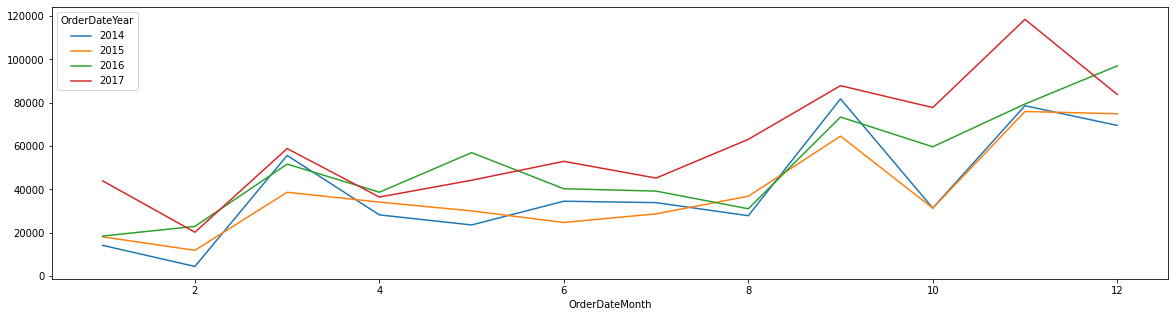

In [4]:
import matplotlib.pyplot  as plt
%matplotlib inline
salesMonthYear.plot(figsize=(20,5))

In [73]:
salesMonthYear

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,14236.8950,18174.0756,18542.4910,43971.3740
2,4519.8920,11951.4110,22978.8150,20301.1334
3,55691.0090,38726.2520,51715.8750,58872.3528
4,28295.3450,34195.2085,38750.0390,36521.5361
5,23648.2870,30131.6865,56987.7280,44261.1102
6,34595.1276,24797.2920,40344.5340,52981.7257
7,33946.3930,28765.3250,39261.9630,45264.4160
8,27909.4685,36898.3322,31115.3743,63120.8880
9,81777.3508,64595.9180,73410.0249,87866.6520


# windows functions

array([<AxesSubplot:xlabel='OrderDateMonth'>,
       <AxesSubplot:xlabel='OrderDateMonth'>,
       <AxesSubplot:xlabel='OrderDateMonth'>,
       <AxesSubplot:xlabel='OrderDateMonth'>], dtype=object)

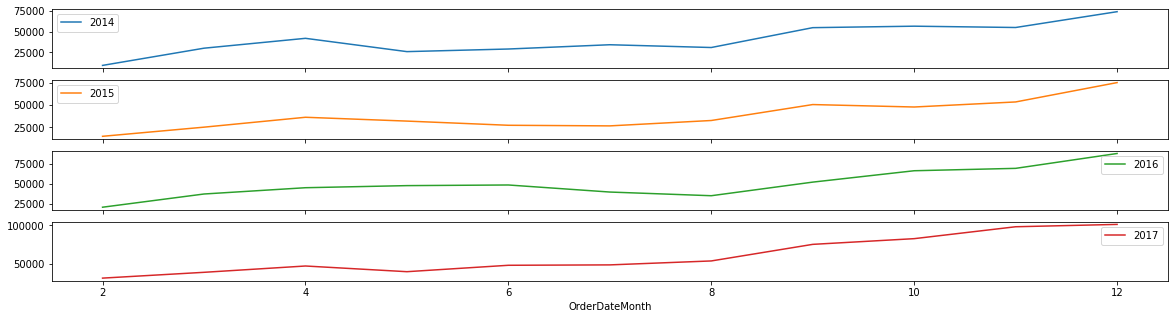

In [78]:
robject=salesMonthYear.rolling(2)
#robject.mean().plot(figsize=(20,5))
robject.mean().plot(subplots=True,figsize=(20,5))

In [80]:
kkk=pd.DataFrame(data={'A':range(10)})
kkk

,A
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [95]:
expObj=kkk.expanding(min_periods=1)

In [97]:
kkk['expP1']=expObj.mean()
kkk

,A,expP1
0,0,0.0
1,1,0.5
2,2,1.0
3,3,1.5
4,4,2.0
5,5,2.5
6,6,3.0
7,7,3.5
8,8,4.0
9,9,4.5


In [109]:
exp1Obj=kkk.expanding(center=True,min_periods=1)


<ipython-input-109-d2b3ee51d168>:1: FutureWarning: The `center` argument on `expanding` will be removed in the future
  exp1Obj=kkk.expanding(center=True,min_periods=1)


In [110]:
kkk['expP1']=exp1Obj.mean()
kkk

,A,expP1
0,0,0.0
1,1,0.5
2,2,1.0
3,3,1.5
4,4,2.0
5,5,2.5
6,6,3.0
7,7,3.5
8,8,4.0
9,9,4.5


In [111]:
kk=pd.DataFrame(data={'A':range(10)})
expObj=kk.ewm(halflife=.5)

In [112]:
kk['expMean']=expObj.mean()
kk

,A,expMean
0,0,0.000000
1,1,0.800000
2,2,1.714286
3,3,2.682353
4,4,3.671554
5,5,4.668132
6,6,5.667094
7,7,6.666789
8,8,7.666701
9,9,8.666676


# rank

In [7]:
#salesMonthYear.rank()
salesMonthYear.rank(ascending=False)

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,11.0,11.0,12.0,10.0
2,12.0,12.0,11.0,12.0
3,4.0,4.0,6.0,6.0
4,8.0,6.0,9.0,11.0
5,10.0,8.0,5.0,9.0
6,5.0,10.0,7.0,7.0
7,6.0,9.0,8.0,8.0
8,9.0,5.0,10.0,5.0
9,1.0,3.0,3.0,2.0


In [8]:
sampleDF=pd.DataFrame(data={'A':[100,101,102,101,103,105,107,107,105,99]})

In [9]:
sampleDF['defaultRank']=sampleDF.rank() #if same value comes,then average 
sampleDF  # for eg: 101 for 3 and 4, so avg of 3,4 ie 3.5 is given to both

,A,defaultRank
0,100,2.0
1,101,3.5
2,102,5.0
3,101,3.5
4,103,6.0
5,105,7.5
6,107,9.5
7,107,9.5
8,105,7.5
9,99,1.0


In [10]:
sampleDF['denseRank']=sampleDF['A'].rank(method='dense') # gives same rank,not avg
sampleDF   # but also starts from where left,not jump to 5  as in below eg

,A,defaultRank,denseRank
0,100,2.0,2.0
1,101,3.5,3.0
2,102,5.0,4.0
3,101,3.5,3.0
4,103,6.0,5.0
5,105,7.5,6.0
6,107,9.5,7.0
7,107,9.5,7.0
8,105,7.5,6.0
9,99,1.0,1.0


In [11]:
sampleDF['minRank']=sampleDF['A'].rank(method='min')
sampleDF

,A,defaultRank,denseRank,minRank
0,100,2.0,2.0,2.0
1,101,3.5,3.0,3.0
2,102,5.0,4.0,5.0
3,101,3.5,3.0,3.0
4,103,6.0,5.0,6.0
5,105,7.5,6.0,7.0
6,107,9.5,7.0,9.0
7,107,9.5,7.0,9.0
8,105,7.5,6.0,7.0
9,99,1.0,1.0,1.0


In [12]:
sampleDF['maxRank']=sampleDF['A'].rank(method='max')
sampleDF

,A,defaultRank,denseRank,minRank,maxRank
0,100,2.0,2.0,2.0,2.0
1,101,3.5,3.0,3.0,4.0
2,102,5.0,4.0,5.0,5.0
3,101,3.5,3.0,3.0,4.0
4,103,6.0,5.0,6.0,6.0
5,105,7.5,6.0,7.0,8.0
6,107,9.5,7.0,9.0,10.0
7,107,9.5,7.0,9.0,10.0
8,105,7.5,6.0,7.0,8.0
9,99,1.0,1.0,1.0,1.0


In [14]:
someMoreDf=data.groupby(['OrderDateYear','Category']).agg({'Profit':'sum'}).reset_index()
someMoreDf

,OrderDateYear,Category,Profit
0,2014,Furniture,5457.7255
1,2014,Office Supplies,22593.4161
2,2014,Technology,21492.8325
3,2015,Furniture,3015.2029
4,2015,Office Supplies,25099.5338
5,2015,Technology,33503.8670
6,2016,Furniture,6959.9531
7,2016,Office Supplies,35061.2292
8,2016,Technology,39773.9920
9,2017,Furniture,3018.3913


In [15]:
someMoreDf['overallRank']=someMoreDf['Profit'].rank()
someMoreDf

,OrderDateYear,Category,Profit,overallRank
0,2014,Furniture,5457.7255,3.0
1,2014,Office Supplies,22593.4161,6.0
2,2014,Technology,21492.8325,5.0
3,2015,Furniture,3015.2029,1.0
4,2015,Office Supplies,25099.5338,7.0
5,2015,Technology,33503.8670,8.0
6,2016,Furniture,6959.9531,4.0
7,2016,Office Supplies,35061.2292,9.0
8,2016,Technology,39773.9920,11.0
9,2017,Furniture,3018.3913,2.0


In [19]:
for i in someMoreDf.groupby("OrderDateYear")["Profit"]:
    print (i)

(2014, 0     5457.7255
1    22593.4161
2    21492.8325
Name: Profit, dtype: float64)
(2015, 3     3015.2029
4    25099.5338
5    33503.8670
Name: Profit, dtype: float64)
(2016, 6     6959.9531
7    35061.2292
8    39773.9920
Name: Profit, dtype: float64)
(2017, 9      3018.3913
10    39736.6217
11    50684.2566
Name: Profit, dtype: float64)


In [18]:
someMoreDf['groupRank']=someMoreDf.groupby("OrderDateYear")["Profit"].rank(ascending=False,method='dense')
someMoreDf

,OrderDateYear,Category,Profit,overallRank,groupRank
0,2014,Furniture,5457.7255,3.0,3.0
1,2014,Office Supplies,22593.4161,6.0,1.0
2,2014,Technology,21492.8325,5.0,2.0
3,2015,Furniture,3015.2029,1.0,3.0
4,2015,Office Supplies,25099.5338,7.0,2.0
5,2015,Technology,33503.8670,8.0,1.0
6,2016,Furniture,6959.9531,4.0,3.0
7,2016,Office Supplies,35061.2292,9.0,2.0
8,2016,Technology,39773.9920,11.0,1.0
9,2017,Furniture,3018.3913,2.0,3.0


# percent change

In [5]:
data=pd.read_excel('Sample - Superstore.xls')
data['OrderDateMonth']=data['Order Date'].apply(lambda x: x.month)
data['OrderDateYear']=data['Order Date'].apply(lambda x: x.year)
salesMonthYear=pd.pivot_table(data,index=['OrderDateMonth'],columns=['OrderDateYear'],aggfunc='sum',values='Sales')

In [6]:
salesMonthYear.pct_change()

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,NaN,NaN,NaN,NaN
2,-0.682523,-0.342392,0.239252,-0.538310
3,11.321314,2.240308,1.250589,1.899954
4,-0.491923,-0.117002,-0.250713,-0.379649
5,-0.164234,-0.118833,0.470650,0.211918
6,0.462902,-0.177036,-0.292049,0.197027
7,-0.018752,0.160019,-0.026833,-0.145660
8,-0.177837,0.282736,-0.207493,0.394492
9,1.930093,0.750646,1.359285,0.392038


In [7]:
salesMonthYear

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,14236.8950,18174.0756,18542.4910,43971.3740
2,4519.8920,11951.4110,22978.8150,20301.1334
3,55691.0090,38726.2520,51715.8750,58872.3528
4,28295.3450,34195.2085,38750.0390,36521.5361
5,23648.2870,30131.6865,56987.7280,44261.1102
6,34595.1276,24797.2920,40344.5340,52981.7257
7,33946.3930,28765.3250,39261.9630,45264.4160
8,27909.4685,36898.3322,31115.3743,63120.8880
9,81777.3508,64595.9180,73410.0249,87866.6520


In [8]:
salesMonthYear.pct_change(axis=1)

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,NaN,0.276548,0.020271,1.371384
2,NaN,1.644181,0.922686,-0.116528
3,NaN,-0.304623,0.335422,0.138381
4,NaN,0.208510,0.133201,-0.057510
5,NaN,0.274159,0.891289,-0.223322
6,NaN,-0.283214,0.626973,0.313232
7,NaN,-0.152625,0.364906,0.152882
8,NaN,0.322072,-0.156727,1.028608
9,NaN,-0.210100,0.136450,0.196930


In [18]:
salesMonthYear.pct_change(periods=2)

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,2.911738,1.130851,1.789047,0.338879
4,5.260182,1.861186,0.686338,0.798990
5,-0.575366,-0.221931,0.101939,-0.248185
6,0.222644,-0.274831,0.041148,0.450698
7,0.435469,-0.045346,-0.311045,0.022668
8,-0.193254,0.487998,-0.228759,0.191371
9,1.409014,1.245618,0.869749,0.941186


OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,NaN,NaN,NaN,NaN
2,-0.682523,-0.342392,0.239252,-0.538310
3,11.321314,2.240308,1.250589,1.899954
4,-0.491923,-0.117002,-0.250713,-0.379649
5,-0.164234,-0.118833,0.470650,0.211918
6,0.462902,-0.177036,-0.292049,0.197027
7,-0.018752,0.160019,-0.026833,-0.145660
8,-0.177837,0.282736,-0.207493,0.394492
9,1.930093,0.750646,1.359285,0.392038


In [24]:
salesMonthYear.loc[4,2014]=np.nan
salesMonthYear.loc[5,2014]=np.nan

In [25]:
salesMonthYear

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,14236.8950,18174.0756,18542.4910,43971.3740
2,4519.8920,11951.4110,22978.8150,20301.1334
3,55691.0090,38726.2520,51715.8750,58872.3528
4,NaN,34195.2085,38750.0390,36521.5361
5,NaN,30131.6865,56987.7280,44261.1102
6,34595.1276,24797.2920,40344.5340,52981.7257
7,33946.3930,28765.3250,39261.9630,45264.4160
8,27909.4685,36898.3322,31115.3743,63120.8880
9,81777.3508,64595.9180,73410.0249,87866.6520


In [30]:
salesMonthYear.pct_change(periods=1,fill_method='backfill')
#salesMonthYear.pct_change(periods=1,fill_method='pad')
#salesMonthYear

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,NaN,NaN,NaN,NaN
2,-0.682523,-0.342392,0.239252,-0.538310
3,11.321314,2.240308,1.250589,1.899954
4,-0.378802,-0.117002,-0.250713,-0.379649
5,0.000000,-0.118833,0.470650,0.211918
6,0.000000,-0.177036,-0.292049,0.197027
7,-0.018752,0.160019,-0.026833,-0.145660
8,-0.177837,0.282736,-0.207493,0.394492
9,1.930093,0.750646,1.359285,0.392038
